In [4]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split y escalado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as IMBPipeline

                                 
# Herramientas de selección de modelos y evaluación
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

# Para manejar desequilibrios en las clases del target --> creación de datos artificiales para balanceo
from imblearn.over_sampling import SMOTE

# Configuración de visualización
%matplotlib inline
sns.set(style="whitegrid")

# Funciones específicas
import sys
sys.path.append('..')  
from scripts import utilities as fs

In [3]:

train_df_cleaned = pd.read_csv('../data/clean_data.csv')


In [6]:
pd.set_option('display.max_columns', None)
train_df_cleaned.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Not Specified,Payday Loan,Credit-Builder Loan,Mortgage Loan,Home Equity Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan
0,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,1,809.98,26.822620,265.0,0,49.574949,80.415295,312.494089,2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,0,0,1,0,1,1,0,0,1
1,23,19114.12,3093.745000,3,4,3,4,18,14.0,11.27,4.0,2,809.98,31.944960,219.0,0,49.574949,118.280222,284.629162,2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,0,0,1,0,1,1,0,0,1
2,33,19114.12,3093.745000,3,4,3,4,3,7.0,9.52,4.0,2,809.98,28.609352,267.0,0,49.574949,81.699521,331.209863,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,0,0,1,0,1,1,0,0,1
3,23,19114.12,3093.745000,3,4,3,4,5,4.0,6.27,4.0,2,809.98,31.377862,268.0,0,49.574949,199.458074,223.451310,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,1,0,1,1,0,0,1
4,23,19114.12,1824.843333,3,4,3,4,6,14.0,11.27,4.0,2,809.98,24.797347,269.0,0,49.574949,41.420153,341.489231,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,0,0,1,0,1,1,0,0,1


In [4]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92930 entries, 0 to 92929
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               92930 non-null  int64  
 1   Annual_Income                     92930 non-null  float64
 2   Monthly_Inhand_Salary             92930 non-null  float64
 3   Num_Bank_Accounts                 92930 non-null  int64  
 4   Num_Credit_Card                   92930 non-null  int64  
 5   Interest_Rate                     92930 non-null  int64  
 6   Num_of_Loan                       92930 non-null  int64  
 7   Delay_from_due_date               92930 non-null  int64  
 8   Num_of_Delayed_Payment            92930 non-null  float64
 9   Changed_Credit_Limit              92930 non-null  float64
 10  Num_Credit_Inquiries              92930 non-null  float64
 11  Credit_Mix                        92930 non-null  int64  
 12  Outs

In [17]:
X = train_df_cleaned.drop('Credit_Score', axis=1) 
y = train_df_cleaned['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Buscar todas las columnas creadas a partir del encdoding de 'Occupation' y 'Month' y eliminarlas
cols_to_drop = [col for col in X_train.columns if 'Occupation_' in col or 'Month_' in col]
X_train = X_train.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)

In [18]:
scaler = StandardScaler()

scaler.fit(X_train) # Aprende los parámetros (media y desviación estándar para cada característica)

# Escalo tanto el conjunto de entrenamiento como el de prueba,
# aplicando el escalado a los datos usando los parámetros aprendidos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
# Compruebo que se haya aplicado correctamente el escalado
pd.set_option('display.float_format', '{:.2f}'.format)

X_train_scaled.describe().round(2)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Not Specified,Payday Loan,Credit-Builder Loan,Mortgage Loan,Home Equity Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan
count,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00,74344.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.82,-1.22,-1.26,-2.08,-2.70,-1.55,-1.47,-1.44,-2.27,-1.62,-1.54,-1.61,-1.24,-2.40,-2.32,-1.05,-1.05,-1.06,-1.89,-0.46,-0.36,-0.34,-0.40,-0.70,-0.87,-0.68,-0.68,-0.68,-0.68,-0.67,-0.67,-0.67,-0.66
25%,-0.78,-0.83,-0.76,-0.92,-0.74,-0.75,-0.63,-0.76,-0.75,-0.74,-0.72,-0.08,-0.74,-0.83,-0.71,-1.05,-0.71,-0.61,-0.62,-0.46,-0.36,-0.34,-0.40,-0.70,-0.87,-0.68,-0.68,-0.68,-0.68,-0.67,-0.67,-0.67,-0.66
50%,-0.03,-0.32,-0.32,-0.14,-0.25,-0.17,-0.21,-0.22,0.09,-0.16,-0.18,-0.08,-0.23,0.00,-0.02,0.96,-0.33,-0.32,-0.31,-0.46,-0.36,-0.34,-0.40,-0.70,-0.87,-0.68,-0.68,-0.68,-0.68,-0.67,-0.67,-0.67,-0.66
75%,0.72,0.61,0.45,0.63,0.73,0.63,0.62,0.46,0.76,0.62,0.64,-0.08,0.46,0.82,0.75,0.96,0.44,0.19,0.31,-0.46,-0.36,-0.34,-0.40,1.42,1.15,1.46,1.46,1.48,1.48,1.49,1.49,1.49,1.51
max,6.27,2.80,3.76,1.80,2.19,9.83,8.15,3.10,2.45,4.06,2.54,1.44,3.10,3.46,1.92,0.96,3.82,5.54,5.64,2.17,2.80,2.93,2.49,1.42,1.15,1.46,1.46,1.48,1.48,1.49,1.49,1.49,1.51


CV Accuracy Scores: [0.6334656  0.62660569 0.63111171 0.63205327 0.62927092]
CV Accuracy Mean: 0.6305014361546493 ± 0.0023773046856797484
Accuracy en el conjunto de entrenamiento: 0.631214354890778
Accuracy en el conjunto de prueba: 0.6299365113526311

Reporte de clasificación (conjunto de prueba):
               precision    recall  f1-score   support

           0       0.61      0.67      0.64      5401
           1       0.79      0.55      0.65      9869
           2       0.46      0.81      0.59      3316

    accuracy                           0.63     18586
   macro avg       0.62      0.68      0.62     18586
weighted avg       0.68      0.63      0.63     18586



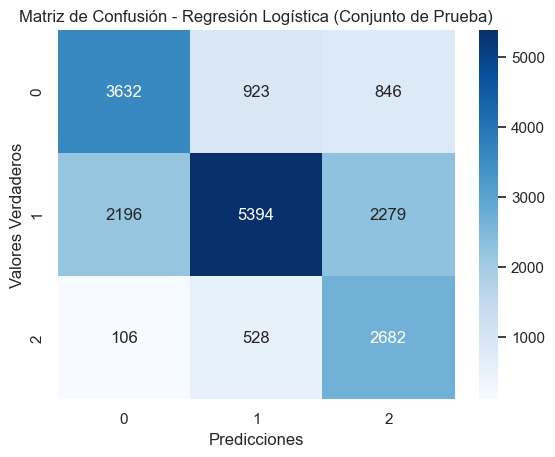

In [12]:
# class_weight='balanced' para ajustar los pesos dando más importancia las clases con frecuencias más bajas --> útil para lidiar con clases desbalanceadas como es el caso
# solver='lbfgs' es un algoritmo de optimización que aproxima el método de Broyden-Fletcher-Goldfarb-Shanno (BFGS),
# utilizado para encontrar los parámetros que minimizan la función de coste.
# max_iter=1000 define el número máximo de iteraciones que el solucionador ejecutará,
# lo que es útil para asegurar que el algoritmo tenga suficientes iteraciones para converger a una solución.

# Inicialización del modelo
log_reg = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    solver='lbfgs',
    max_iter=3000
)

cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')


log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)

y_test_pred = log_reg.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_test_pred)


print(f'CV Accuracy Scores: {cv_scores}')
print(f'CV Accuracy Mean: {np.mean(cv_scores)} ± {np.std(cv_scores)}')
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train}')
print(f'Accuracy en el conjunto de prueba: {accuracy_test}\n')
print("Reporte de clasificación (conjunto de prueba):\n", classification_report(y_test, y_test_pred))
conf_matrix_log_reg = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión - Regresión Logística (Conjunto de Prueba)')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Mejores hiperparámetros: {'var_smoothing': 1.0}
Mejor puntaje de exactitud: 0.6028058857778522

Accuracy en el conjunto de entrenamiento: 0.6028058753900786
Accuracy en el conjunto de prueba: 0.6000753255138276

Reporte de clasificación (Conjunto de test):
               precision    recall  f1-score   support

           0       0.62      0.67      0.64      5401
           1       0.79      0.49      0.60      9869
           2       0.42      0.83      0.55      3316

    accuracy                           0.60     18586
   macro avg       0.61      0.66      0.60     18586
weighted avg       0.67      0.60      0.60     18586



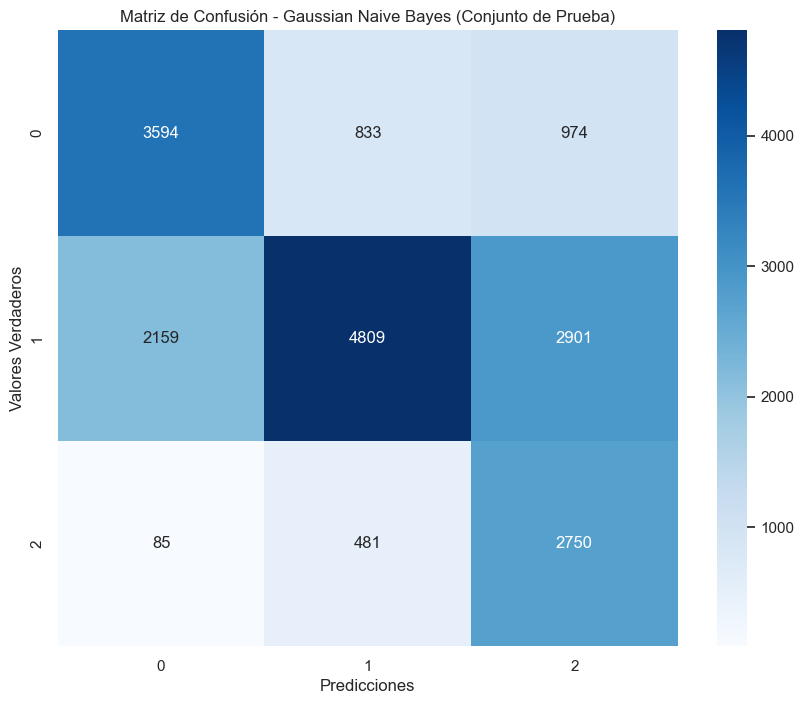

In [13]:
gnb = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# GridSearchCV con cross validation de 5 folsd
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')


grid_search.fit(X_train_scaled, y_train)

print(f'\nMejores hiperparámetros: {grid_search.best_params_}')
print(f'Mejor puntaje de exactitud: {grid_search.best_score_}')

gnb_best = grid_search.best_estimator_
y_train_pred = cross_val_predict(gnb_best, X_train_scaled, y_train, cv=5)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_test_pred = gnb_best.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)


print("\nAccuracy en el conjunto de entrenamiento:", accuracy_train)
print("Accuracy en el conjunto de prueba:", accuracy_test)

print("\nReporte de clasificación (Conjunto de test):\n", classification_report(y_test, y_test_pred))

conf_matrix_gnb = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión - Gaussian Naive Bayes (Conjunto de Prueba)')
plt.show()

Métricas muy bajas por lo que no parece interesante estudiarlas a fondo. Las notas son más bajas que en el modelo de regresión logistica aunque no hay overfitting

Tal vez las variables no sean del todo independientes.

In [ ]:

xgbc = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',  # 'mlogloss' para clasificación multiclase
)


xgbc_params = {
    'n_estimators': [100, 150, 200],  # Cantidad de árboles a construir
    'max_depth': [6, 8, 10],  # Máxima profundidad de cada árbol
    'gamma': [0, 0.5, 1],  # parámetro de regularización para controlar el sobreajuste
    'reg_alpha': [0, 0.5, 1],  # Coeficiente de regularización L1
    'reg_lambda': [1, 1.5, 2],  # coeficiente de regularización L2
    'subsample': [0.5, 0.75, 1],  # Fracción de muestras para entrenar cada árbol
    'colsample_bytree': [0.5, 0.75, 1],  # Fracción de características para entrenar cada árbol
    'learning_rate': [0.01, 0.1, 0.3]  # Tasa de aprendizaje para ajustar los pesos de las prediccioness
}


xgbc_grid = HalvingGridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_params,
    factor=2,  
    cv=5,
    scoring='accuracy',
    n_jobs=4,
    verbose=1
)


xgbc_search = xgbc_grid.fit(X_train_scaled, y_train)

print(f'\nMejores hiperparámetros: {xgbc_search.best_params_}')
print(f'Mejor puntaje de exactitud: {xgbc_search.best_score_}')

xgbc_best = xgbc_search.best_estimator_
xgbc_best.fit(X_train_scaled, y_train)

y_pred_xgbc = xgbc_best.predict(X_test_scaled)

print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_xgbc))

conf_matrix_xgbc = confusion_matrix(y_test, y_pred_xgbc)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgbc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión - XGBoost')
plt.show()

In [ ]:
gbm = GradientBoostingClassifier(random_state=42)


param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]  # Fracción de muestras para entrenar cada árbol
}


random_search = RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, n_jobs=4, random_state=42)


random_search.fit(X_train_scaled, y_train)

print(f'Mejores hiperparámetros: {random_search.best_params_}')
print(f'Mejor puntuación de exactitud: {random_search.best_score_}')

y_pred = random_search.best_estimator_.predict(X_test_scaled)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión - GBM')
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
    'max_features': ['sqrt', 'log2', None]  
}

# un cv alto, puede llevar aumentar los tiempo considerablemente teniendo en cuenta el gran número de datos
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=7, n_jobs=4, verbose=1, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo con accuracy utilizando validación cruzada con los datos de train
cv_accuracy = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f'CV Accuracy: {cv_accuracy.mean()} ± {cv_accuracy.std()}')

# Evaluar el modelo con el conjunto de test
y_pred = best_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy_test}')

V3 --> EL MÁS BALANCEADO PERO CON MENOS PRECISIÓN

In [14]:
best_params_adjusted = {
    'max_depth': 10,  # Limitar la profundidad del árbol
    'max_features': 'sqrt',
    'min_samples_leaf': 4,  # Aumentar el número mínimo de muestras por hoja
    'min_samples_split': 10,  # Aumentar el número mínimo de muestras para dividir un nodo
    'n_estimators': 100  # Reducir el número de árboles
}


rf_optimized_dos = RandomForestClassifier(
    random_state=42, 
    class_weight='balanced', 
    **best_params_adjusted
)
rf_optimized_dos.fit(X_train_scaled, y_train)


y_pred_train_optimized_dos = rf_optimized_dos.predict(X_train_scaled)
y_pred_optimized_dos = rf_optimized_dos.predict(X_test_scaled)

accuracy_train_optimized_dos = accuracy_score(y_train, y_pred_train_optimized_dos)
accuracy_test_optimized_dos = accuracy_score(y_test, y_pred_optimized_dos)

print(f'Train Accuracy (Altamente regularizado): {accuracy_train_optimized_dos}')
print(f'Test Accuracy (Altamente regularizado): {accuracy_test_optimized_dos}')

Train Accuracy (Altamente regularizado): 0.6804584095555795
Test Accuracy (Altamente regularizado): 0.6716883675885075


In [ ]:

rfc = RandomForestClassifier(random_state=42, class_weight='balanced')

rfc_params = {
  "max_depth": [None, 10, 15],
  "max_leaf_nodes": [None, 10, 15],  # Añadir None para explorar árboles sin restricción de nodos hoja
  "min_samples_leaf": [3, 4, 5],
  "min_samples_split": [2, 4, 6],
  "n_estimators": [100, 150, 200]
}

rfc_grid = HalvingGridSearchCV(
    estimator=rfc,
    param_grid=rfc_params,
    factor=2,  #  un factor menor explora más candidatos --> reducirlo mucho lo igualaria prácticmanete al gridsearch
    cv=5,
    scoring='accuracy',
    n_jobs=3,
    verbose=1
)


rfc_search = rfc_grid.fit(X_train_scaled, y_train)  

rfc_best = rfc_grid.best_estimator_


y_pred_train = rfc_best.predict(X_train_scaled)
y_pred_test = rfc_best.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Train F1-Score: {train_f1}')
print(f'Test F1-Score: {test_f1}')

**Ofrece un equilibrio razonable con una precisión de entrenamiento del ~88.9% y una precisión de prueba del ~76.5%.  
 Aunque la brecha es notable, este modelo parece equilibrar mejor el rendimiento con el control del sobreajuste en comparación con los modelos anteriores**

Se va a realizar un nuevo test enfocado en incluir técnicas que aborden el problema de el desbalanceo de clases con el objetivo de mejorar las métricas,  
especilamente con las clases minoritarias que tienen una relevancia importante en este contexto.

En cuanto al umbral de los hiperparámetros incluidos para realizar las pruebas, se van a seleccionar a través de las múltiples pruebas anteriores. Las experiencias pasadas indican que  
se debe de tener cuidado con utilizar ajustes que creen un modelo demasiado complejo, ya que estaba generando un aprendizaje excesivo y perjuducial de los datos de entrenamiento  
provacando que el modelo tuviera problemas para generalizar y predecir correctamente sobre datos nuevos. (La validación cruzada no ha sido suficiente para evitarlo).

- **Balanceo de Clases con SMOTE:** Aplicar técnicas de sobremuestreo para balancear las clases puede ayudar a mejorar la capacidad del modelo para aprender de las clases minoritarias.  
- **Uso de RandomOverSampler:** Similar a SMOTE, pero selecciona muestras al azar con reemplazo de la clase minoritaria para balancear el conjunto de datos.  
- **Optimización con RandomizedSearchCV:** Explorar un espacio de hiperparámetros más amplio de manera aleatoria puede ayudar a encontrar una combinación óptima que mejore el rendimiento del modelo.  
- **Evaluación con Validación Cruzada Estratificada (StratifiedKFold):** Asegura que cada pliegue de la validación cruzada mantenga la proporción de clases, lo cual es crucial para conjuntos de datos desequilibrados.

El objetivo principal es que el modelo tenga la oportunidad de conocer todas las clases por igual para analizar sus características y cuando tenga que hacer predicts sobre nuevos datos sea capaz de 
diferenciar las clases mejor

RANDOM FOREST --> BALANCED CATEGORIES

In [ ]:
# Paso 1: Crear el pipeline con SMOTE y RandomForestClassifier (sin class_weight='balanced')
pipeline = IMBPipeline([
    ('smote', SMOTE(k_neighbors=5, random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42))  # Quitamos class_weight='balanced' para tratar de evitar el overfitting
])

# Paso 2: Ajustamos los hiperparámetros
rfc_params = {
    'rfc__max_depth': [None, 15, 20],  # Exploramos con y sin límite
    'rfc__max_leaf_nodes': [None, 20, 40],  # Ajuste moderado
    'rfc__min_samples_leaf': [2, 4],  # Incrementamos el mínimo de muestras por hoja
    'rfc__min_samples_split': [6, 8],  # Incrementamos el mínimo para dividir un nodo
    'rfc__n_estimators': [100, 150]  # Reducimos el número de árboles
}

# Paso 3: Mantenemos la configuración de RandomizedSearchCV con validación cruzada estratificada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc_search = RandomizedSearchCV(
    pipeline,
    param_distributions=rfc_params,
    n_iter=50,  # Reducimos las iteraciones para enfocarnos en estos ajustes específicos
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=4,
    verbose=1
)

# Paso 4: Entrenamiento del modelo
rfc_search.fit(X_train_scaled, y_train)

# Mejores hiperparámetros y rendimiento
print("Mejores hiperparámetros:", rfc_search.best_params_)
print(f"Mejor puntuación: {rfc_search.best_score_}")

# Paso 5: Evaluación del modelo
best_model = rfc_search.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Train F1-Score: {f1_score(y_train, y_pred_train, average='macro')}")
print(f"Test F1-Score: {f1_score(y_test, y_pred_test, average='macro')}")

Train Accuracy: 0.9575217905950716
Test Accuracy: 0.7782739696545787
Train F1-Score: 0.9569200726317648
Test F1-Score: 0.7671959201378565
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      5401
           1       0.83      0.76      0.79      9869
           2       0.67      0.77      0.72      3316

    accuracy                           0.78     18586
   macro avg       0.76      0.78      0.77     18586
weighted avg       0.78      0.78      0.78     18586



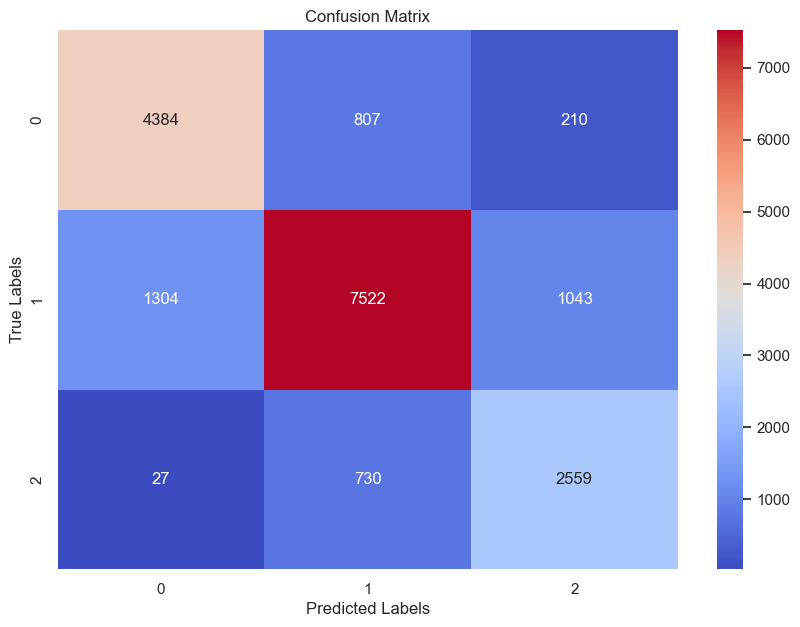

In [15]:
from imblearn.pipeline import Pipeline as IMBPipeline
# Modleo v5 con los mejores ajustes
# Importante: al utilizar un pipeline, la creación de datos sintéticos se aplica automáticamente durante el proceso de entrenamiento del modelo, 
# pero solo afecta al conjunto de datos dentro del pipeline (genera observaciones sintéticas para equilibrar las clases únicamente dentro del flujo de entrenamiento del modelo)
# por tanto,no modifica el conjunto de datos original
best_model = IMBPipeline([
    ('smote', SMOTE(k_neighbors=5, random_state=42)),
    ('rfc', RandomForestClassifier(
        n_estimators=150,
        min_samples_split=6,
        min_samples_leaf=2,
        max_leaf_nodes=None,
        max_depth=None,
        random_state=42
    ))
])

# Entrenamiento del modelo con los datos escalados
best_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

# Precisión y F1-Score
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Train F1-Score: {f1_score(y_train, y_pred_train, average='macro')}")
print(f"Test F1-Score: {f1_score(y_test, y_pred_test, average='macro')}")

# Informe de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm', cbar=True)  # Usando 'coolwarm' para el mapa de calor
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

IGUAL QUE LA VERSION ANTERIOR PERO ESTA VEZ SIN ELIMINAR LAS COLUMNAS DE MONTH Y OCCUPATION DEL DF

In [20]:
from imblearn.pipeline import Pipeline as IMBPipeline
# Modleo v5 con los mejores ajustes
# Importante: al utilizar un pipeline, la creación de datos sintéticos se aplica automáticamente durante el proceso de entrenamiento del modelo, 
# pero solo afecta al conjunto de datos dentro del pipeline (genera observaciones sintéticas para equilibrar las clases únicamente dentro del flujo de entrenamiento del modelo)
# por tanto,no modifica el conjunto de datos original
best_model = IMBPipeline([
    ('smote', SMOTE(k_neighbors=5, random_state=42)),
    ('rfc', RandomForestClassifier(
        n_estimators=150,
        min_samples_split=6,
        min_samples_leaf=2,
        max_leaf_nodes=None,
        max_depth=None,
        random_state=42
    ))
])

# Entrenamiento del modelo con los datos escalados
best_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

# Precisión y F1-Score
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Train F1-Score: {f1_score(y_train, y_pred_train, average='macro')}")
print(f"Test F1-Score: {f1_score(y_test, y_pred_test, average='macro')}")

# Informe de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.962337243086194
Test Accuracy: 0.7809641665769934
Train F1-Score: 0.9617609823368215
Test F1-Score: 0.7690685899753991
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      5401
           1       0.83      0.77      0.80      9869
           2       0.69      0.76      0.72      3316

    accuracy                           0.78     18586
   macro avg       0.76      0.78      0.77     18586
weighted avg       0.78      0.78      0.78     18586



Un poco más de overfitting pero también de precisión, no es interesante el cambio

RANDOM FOREST DEFAULT PARAMETERS

In [ ]:
# Crear el modelo de Random Forest con los parámetros por defecto
rf_default = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos escalados
rf_default.fit(X_train_scaled, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_pred_train = rf_default.predict(X_train_scaled)
y_pred_test = rf_default.predict(X_test_scaled)

# Calcular la precisión en los conjuntos de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")